In [5]:
import pandas as pd
import numpy as np
import os

In [7]:
labels = pd.read_csv('/content/drive/MyDrive/M.SC Graduation Project/00-Final Data set/Data_set_csv.csv')
labels.head()


,Name,Extension,Date accessed,Date modified,Date created,Folder Path,Category
0,Boulder (1).jpg,.jpg,09/08/2025 10:01,03/08/2025 14:22,03/08/2025 14:22,C:\Users\Kelvs\Desktop\Graduation thesis\Datas...,Boulder
1,Boulder (10).jpg,.jpg,09/08/2025 10:01,02/08/2025 23:27,02/08/2025 23:27,C:\Users\Kelvs\Desktop\Graduation thesis\Datas...,Boulder
2,Boulder (11).jpg,.jpg,09/08/2025 10:01,03/08/2025 17:40,03/08/2025 17:40,C:\Users\Kelvs\Desktop\Graduation thesis\Datas...,Boulder
3,Boulder (12).jpg,.jpg,09/08/2025 10:01,03/08/2025 17:46,03/08/2025 17:46,C:\Users\Kelvs\Desktop\Graduation thesis\Datas...,Boulder
4,Boulder (13).jpg,.jpg,09/08/2025 10:01,02/08/2025 23:23,02/08/2025 23:23,C:\Users\Kelvs\Desktop\Graduation thesis\Datas...,Boulder


In [30]:
data_path = '/content/drive/MyDrive/M.SC Graduation Project/00-Final Data set'
filename_column = 'Name'
label_column = 'Category'

# Create a dictionary for quick lookup of labels by filename
labels_dict = labels.set_index(filename_column)[label_column].to_dict()

dataset=[]

# Use os.walk to recursively search for images
for root, dirs, files in os.walk(data_path):
    for filename in files:
        # Convert filename to lowercase for case-insensitive extension check
        filename_lower = filename.lower()
        # Check if the filename is a supported image file (case-insensitive)
        if filename_lower.endswith(('.jpg', '.jpeg', '.png')):
            # Check if the original filename exists in our labels dictionary
            if filename in labels_dict:
                # Get the label from the dictionary
                label = labels_dict[filename]

                # Construct the full path to the image file
                image_full_path = os.path.join(root, filename)

                # We'll store the path and label for later use
                dataset.append({'image_path': image_full_path, 'label': label})
            else:
                print(f"Warning: No label found for image '{filename}'. Skipping.")

# Print some details about your newly created dataset
print(f"\nSuccessfully created a dataset with {len(dataset)} items.")
if dataset:
    print("First item in the dataset:")
    print(dataset[0])


Successfully created a dataset with 363 items.
First item in the dataset:
{'image_path': '/content/drive/MyDrive/M.SC Graduation Project/00-Final Data set/Boulder Coral/Boulder (73).jpg', 'label': 'Boulder'}


In [31]:
# Print the total number of items to confirm the size
print(f"Dataset has {len(dataset)} items.")

# Print the first 5 items to inspect the structure
print("\n--- First 5 data points ---")
for i in range(5):
    if i < len(dataset):
        print(f"Item {i+1}:")
        print(f"  Path: {dataset[i]['image_path']}")
        print(f"  Label: {dataset[i]['label']}")
        print("---")

Dataset has 363 items.

--- First 5 data points ---
Item 1:
  Path: /content/drive/MyDrive/M.SC Graduation Project/00-Final Data set/Boulder Coral/Boulder (73).jpg
  Label: Boulder
---
Item 2:
  Path: /content/drive/MyDrive/M.SC Graduation Project/00-Final Data set/Boulder Coral/Boulder (71).jpg
  Label: Boulder
---
Item 3:
  Path: /content/drive/MyDrive/M.SC Graduation Project/00-Final Data set/Boulder Coral/Boulder (72).jpg
  Label: Boulder
---
Item 4:
  Path: /content/drive/MyDrive/M.SC Graduation Project/00-Final Data set/Boulder Coral/Boulder (77).jpg
  Label: Boulder
---
Item 5:
  Path: /content/drive/MyDrive/M.SC Graduation Project/00-Final Data set/Boulder Coral/Boulder (74).jpg
  Label: Boulder
---


In [32]:
label_counts = labels['Category'].value_counts()
print("Number of items for each category:")
print(label_counts)

Number of items for each category:
Category
Branched    92
Plate       91
Boulder     90
Soft        90
Name: count, dtype: int64


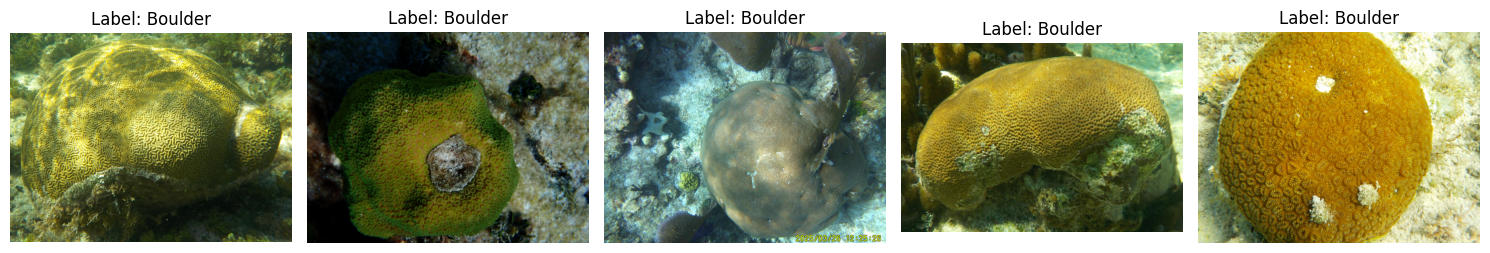

In [33]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming 'dataset' is the list of dictionaries you created

# We will preview the first 5 images in the dataset
num_images_to_preview = 5

# Set up a figure to display the images
plt.figure(figsize=(15, 5)) # Adjust the figure size as needed

# Loop through the first few items in the dataset
for i in range(num_images_to_preview):
    if i < len(dataset):
        # Get the image path and label from your dataset list
        image_path = dataset[i]['image_path']
        label = dataset[i]['label']

        # Open the image file
        try:
            image = Image.open(image_path)

            # Display the image and its label
            plt.subplot(1, num_images_to_preview, i + 1)
            plt.imshow(image)
            plt.title(f"Label: {label}")
            plt.axis('off') # Hide the axes for a cleaner look

        except FileNotFoundError:
            print(f"Error: Image file not found at {image_path}. Skipping.")
        except Exception as e:
            print(f"An error occurred while opening {image_path}: {e}. Skipping.")

plt.tight_layout() # Adjust subplots to fit in the figure
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

# Extract labels from the dataset for stratification
labels = [item['label'] for item in dataset]

# Split the dataset into training and testing sets with stratification
train_data, test_data = train_test_split(
    dataset,
    test_size=0.2,
    random_state=42,  # for reproducibility
    stratify=labels   # stratify based on labels
)

print(f"Training dataset size: {len(train_data)}")
print(f"Testing dataset size: {len(test_data)}")

Training dataset size: 290
Testing dataset size: 73


In [35]:
from collections import Counter

# Extract labels from the original dataset
all_labels = [item['label'] for item in dataset]

# Extract labels from the training set
y_train = [item['label'] for item in train_data]

# Extract labels from the testing set
y_test = [item['label'] for item in test_data]

# Count labels in the original dataset
print("Original Dataset Label Counts:", Counter(all_labels))

# Count labels in the training set
print("Training Set Label Counts:", Counter(y_train))

# Count labels in the testing set
print("Testing Set Label Counts:", Counter(y_test))

Original Dataset Label Counts: Counter({'Branched': 92, 'Plate': 91, 'Boulder': 90, 'Soft': 90})
Training Set Label Counts: Counter({'Branched': 73, 'Plate': 73, 'Boulder': 72, 'Soft': 72})
Testing Set Label Counts: Counter({'Branched': 19, 'Soft': 18, 'Boulder': 18, 'Plate': 18})


In [38]:
import torchvision.models as models

# List available pre-trained models
print("Available pre-trained models in torchvision.models:")
print([model for model in models.__dict__ if callable(models.__dict__[model]) and not model.startswith('_')])

Available pre-trained models in torchvision.models:
['alexnet', 'AlexNet', 'AlexNet_Weights', 'ConvNeXt', 'ConvNeXt_Tiny_Weights', 'ConvNeXt_Small_Weights', 'ConvNeXt_Base_Weights', 'ConvNeXt_Large_Weights', 'convnext_tiny', 'convnext_small', 'convnext_base', 'convnext_large', 'DenseNet', 'DenseNet121_Weights', 'DenseNet161_Weights', 'DenseNet169_Weights', 'DenseNet201_Weights', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'EfficientNet', 'EfficientNet_B0_Weights', 'EfficientNet_B1_Weights', 'EfficientNet_B2_Weights', 'EfficientNet_B3_Weights', 'EfficientNet_B4_Weights', 'EfficientNet_B5_Weights', 'EfficientNet_B6_Weights', 'EfficientNet_B7_Weights', 'EfficientNet_V2_S_Weights', 'EfficientNet_V2_M_Weights', 'EfficientNet_V2_L_Weights', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_s', 'efficientnet_v2_m', 'efficientnet_v2_l', 'googlenet', 'GoogLeNet'

In [41]:
import torch
import torchvision.models as models

# Load the pre-trained ResNet50 model
# We set weights to the latest ImageNet weights
resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

print("Pre-trained ResNet50 model loaded successfully.")

Pre-trained ResNet50 model loaded successfully.


In [42]:
import torch.nn as nn

# Get the number of input features for the last fully connected layer
num_ftrs = resnet50.fc.in_features

# Replace the last fully connected layer with a new one
# The number of output features should be equal to the number of classes in your dataset
num_classes = 4 # Based on the label counts (Branched, Plate, Boulder, Soft)
resnet50.fc = nn.Linear(num_ftrs, num_classes)

print(f"ResNet50 classifier modified to have {num_classes} output classes.")

ResNet50 classifier modified to have 4 output classes.


In [44]:
import torch.optim as optim
import torch.nn as nn

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet50.parameters(), lr=0.001) # You can adjust the learning rate

print("Loss function and optimizer defined.")

Loss function and optimizer defined.


In [45]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# 1. Define the transformations and augmentations
# These transformations are common for pre-trained models like ResNet
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(), # Data Augmentation
        transforms.RandomRotation(15),     # Data Augmentation
        transforms.ToTensor(),             # Convert image to a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}

# 2. Create a custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list
        self.transform = transform
        # Create a mapping from label name to integer index
        # Assuming the labels are consistent across splits
        all_labels = sorted(list(set([item['label'] for item in data_list])))
        self.label_map = {label: i for i, label in enumerate(all_labels)}


    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        # Get the path and label from the list
        image_path = self.data_list[idx]['image_path']
        label_name = self.data_list[idx]['label']

        # Get the integer label using the label map
        label = self.label_map[label_name]

        # Load the image
        image = Image.open(image_path).convert('RGB')

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        # Return the processed image and integer label
        return image, label

# 3. Instantiate the dataset and dataloader
train_dataset = CustomDataset(train_data, transform=data_transforms['train'])
val_dataset = CustomDataset(test_data, transform=data_transforms['val']) # Using test_data as validation for now

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Data loaders for training and validation created.")

Data loaders for training and validation created.


In [48]:
import torch
import time
import copy

# Check if GPU is available and move the model to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet50 = resnet50.to(device)

# Number of training epochs
num_epochs = 10 # You can adjust this

# Track best model
best_model_wts = copy.deepcopy(resnet50.state_dict())
best_acc = 0.0

# Training loop
for epoch in range(num_epochs):
    print(f'Epoch {epoch}/{num_epochs - 1}')
    print('-' * 10)

    # Each epoch has a training and validation phase
    for phase in ['train', 'val']:
        if phase == 'train':
            resnet50.train()  # Set model to training mode
            dataloader = train_loader
        else:
            resnet50.eval()   # Set model to evaluate mode
            dataloader = val_loader

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            # track history if only in train
            with torch.set_grad_enabled(phase == 'train'):
                outputs = resnet50(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(dataloader.dataset)
        epoch_acc = running_corrects.double() / len(dataloader.dataset)

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # deep copy the model if it's the best accuracy
        if phase == 'val' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(resnet50.state_dict())

    print()

print('Training complete.')
print(f'Best validation Acc: {best_acc:.4f}')

# load best model weights
resnet50.load_state_dict(best_model_wts)

Epoch 0/9
----------
train Loss: 0.8358 Acc: 0.7000
val Loss: 2.9507 Acc: 0.5205

Epoch 1/9
----------
train Loss: 0.5047 Acc: 0.8448
val Loss: 2.5461 Acc: 0.6027

Epoch 2/9
----------
train Loss: 0.5080 Acc: 0.8517
val Loss: 1.7374 Acc: 0.6575

Epoch 3/9
----------


KeyboardInterrupt: 